# Acquire Zillow

## For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

## You will have a zillow.ipynb file and a helper file for each section in the pipeline.

* Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe.

* Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

* Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.

* Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
* Only include properties that include a latitude and longitude value.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from env import user, host, password
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_connection(database, user=user, host=host, password=password):
    '''get URL with user, host, and password from env '''
    
    return f"mysql+pymysql://{user}:{password}@{host}/{database}"

In [3]:
def get_sql_data(database,query):
    ''' 
        Take in a database and query
        check if csv exists for the queried database
        if it does read from the csv
        if it does not create the csv then read from the csv  
    '''
    
    if os.path.isfile(f'{database}_query.csv') == False:   # check for the file
        
        df = pd.read_sql(query, get_connection(database))  # create df for query
        
        df.to_csv(f'{database}_query.csv',index = False)   # cache file
        
    return pd.read_csv(f'{database}_query.csv') # return contents of file

In [4]:
query = '''

select * 
from predictions_2017

left join properties_2017 using(parcelid)
left join airconditioningtype using(airconditioningtypeid)
left join architecturalstyletype using(architecturalstyletypeid)
left join buildingclasstype using(buildingclasstypeid)
left join heatingorsystemtype using(heatingorsystemtypeid)
left join propertylandusetype using(propertylandusetypeid)
left join storytype using(storytypeid)
left join typeconstructiontype using(typeconstructiontypeid)

where latitude is not null

and longitude is not null

'''

database = "zillow"

In [5]:
df = get_sql_data(database,query)
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,...,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,0,0.025595,...,NaN,NaN,6.059063e+13,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1,0.055619,...,NaN,NaN,6.111001e+13,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,2,0.005383,...,NaN,NaN,6.059022e+13,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,3,-0.103410,...,NaN,NaN,6.037300e+13,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,4,0.006940,...,NaN,NaN,6.037124e+13,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [6]:
df.shape

(77580, 69)

In [7]:
# drop duplicate parcelid keeping the latest one by transaction date
df = df.sort_values('transactiondate').drop_duplicates('parcelid',keep='last')

In [8]:
df.shape

(77381, 69)

In [9]:
df.parcelid.value_counts()

11933699    1
11881987    1
13063680    1
11709951    1
11445758    1
           ..
10975930    1
11625145    1
11365048    1
11082422    1
12853244    1
Name: parcelid, Length: 77381, dtype: int64

# Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [10]:
df.shape

(77381, 69)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 0 to 77579
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77381 non-null  float64
 3   heatingorsystemtypeid         49440 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      206 non-null    float64
 6   airconditioningtypeid         24953 non-null  float64
 7   parcelid                      77381 non-null  int64  
 8   id                            77381 non-null  int64  
 9   logerror                      77381 non-null  float64
 10  transactiondate               77381 non-null  object 
 11  id.1                          77381 non-null  int64  
 12  basementsqft                  50 non-null     float64
 13  b

In [12]:
df.describe()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,222.000000,50.0,77381.000000,49440.000000,15.000000,206.000000,24953.000000,7.738100e+04,77381.000000,77381.000000,...,77118.000000,17560.000000,172.0,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04
mean,6.040541,7.0,261.826340,3.920510,3.933333,7.388350,1.813289,1.300715e+07,38848.692754,0.016625,...,1968.635831,1.434738,1.0,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13
std,0.557285,0.0,5.141199,3.592779,0.258199,2.734542,2.967894,3.481346e+06,22402.429065,0.170191,...,23.786032,0.544569,0.0,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12
min,4.000000,7.0,31.000000,1.000000,3.000000,2.000000,1.000000,1.071186e+07,0.000000,-4.655420,...,1824.000000,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13
25%,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.153830e+07,19461.000000,-0.024377,...,1953.000000,1.000000,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13
50%,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.253157e+07,38870.000000,0.006627,...,1970.000000,1.000000,1.0,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13
75%,6.000000,7.0,266.000000,7.000000,4.000000,7.000000,1.000000,1.421183e+07,58253.000000,0.039203,...,1987.000000,2.000000,1.0,2.187870e+05,5.690015e+05,2016.0,3.667965e+05,6927.790000,15.000000,6.059042e+13
max,13.000000,7.0,275.000000,24.000000,4.000000,21.000000,13.000000,1.676893e+08,77613.000000,5.262999,...,2016.000000,6.000000,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14


In [13]:
# get value counts for discrete variables

desc_cols = [col for col in df.columns if (df[col].dtype == "object")]


for col in desc_cols:
    
    print(col)
    print(df[col].value_counts())
    print()

transactiondate
2017-06-30    1189
2017-04-28     911
2017-05-31     867
2017-07-28     814
2017-08-31     781
              ... 
2017-06-03       1
2017-03-12       1
2017-09-25       1
2017-02-18       1
2017-07-09       1
Name: transactiondate, Length: 265, dtype: int64

propertycountylandusecode
0100    26714
122     13045
010C     8813
0101     6399
34       4922
        ...  
020M        1
1432        1
040B        1
010L        1
040G        1
Name: propertycountylandusecode, Length: 75, dtype: int64

propertyzoningdesc
LAR1          6747
LAR3          2437
LARS          1389
LBR1N         1222
LARD1.5       1127
              ... 
PDR 1 1000       1
WHP*             1
WD4*             1
LNC3*            1
LCR2000020       1
Name: propertyzoningdesc, Length: 1907, dtype: int64

taxdelinquencyflag
Y    2886
Name: taxdelinquencyflag, dtype: int64

airconditioningdesc
Central          23133
Yes               1574
None               167
Wall Unit           53
Refrigeration       26


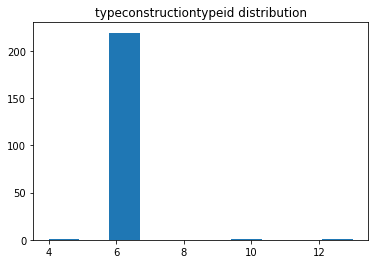

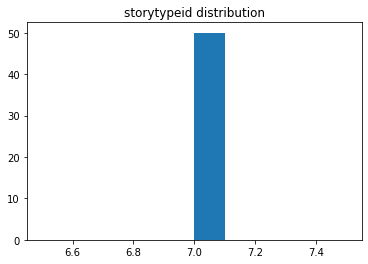

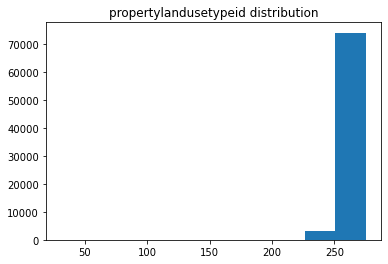

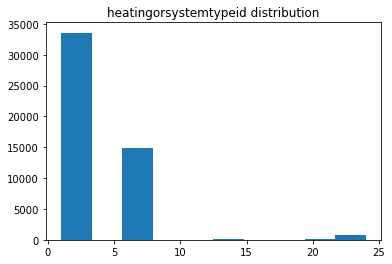

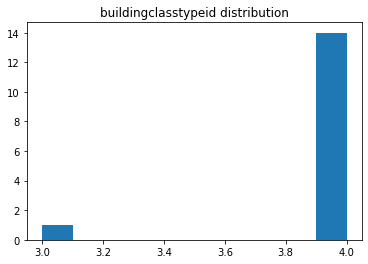

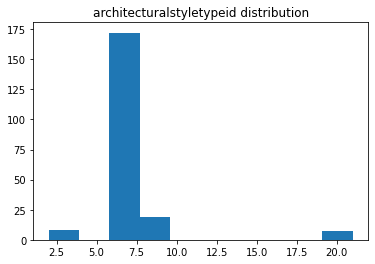

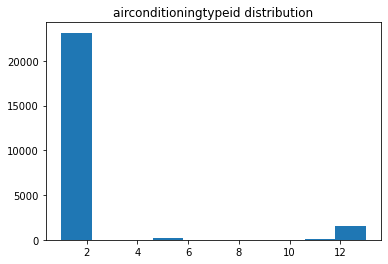

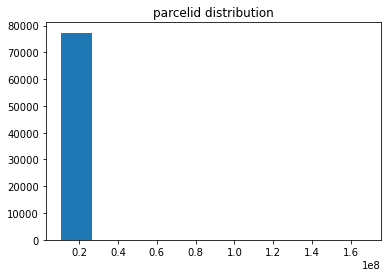

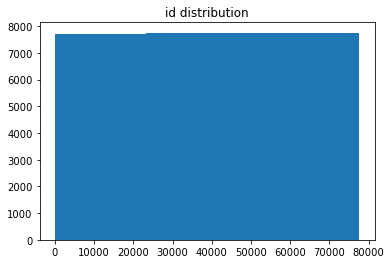

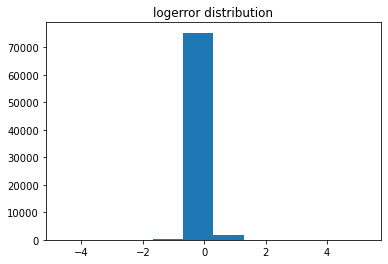

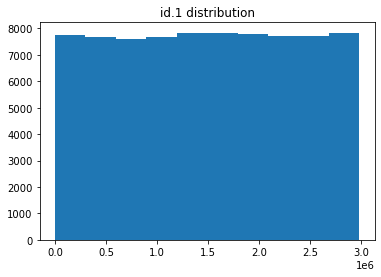

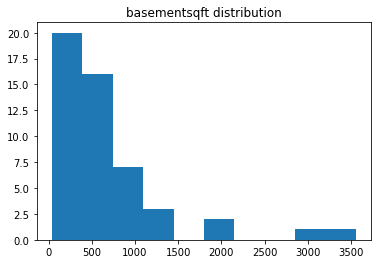

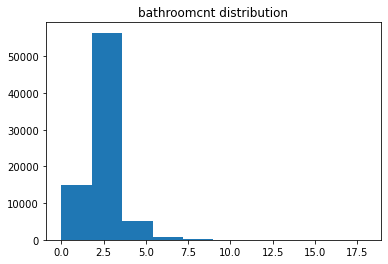

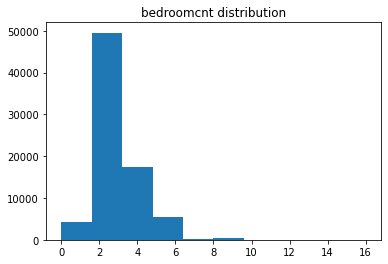

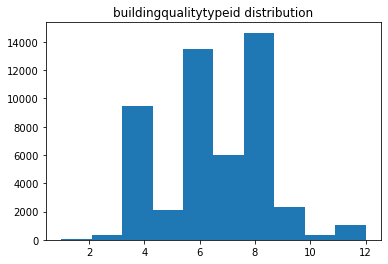

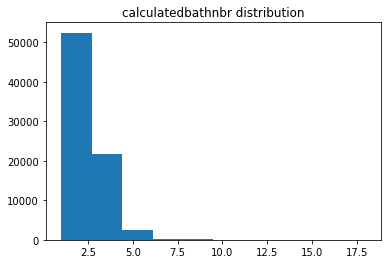

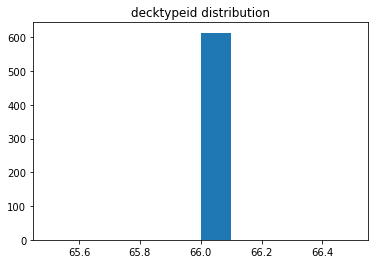

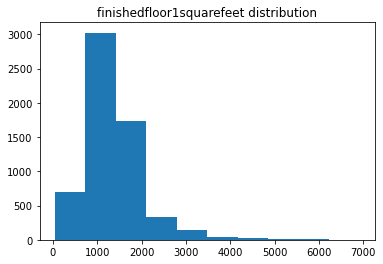

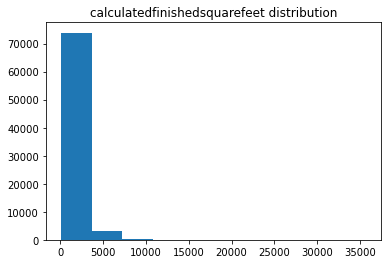

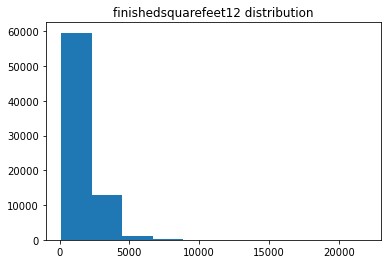

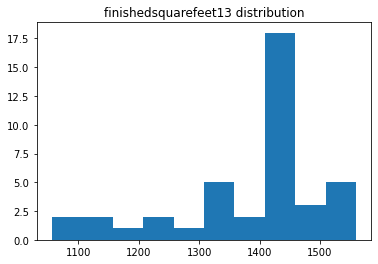

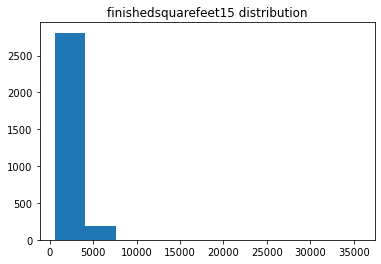

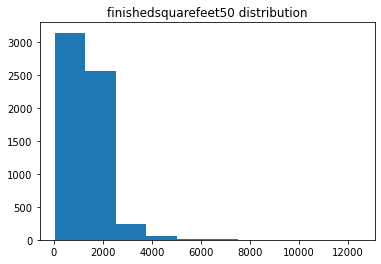

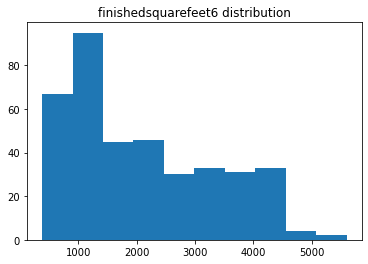

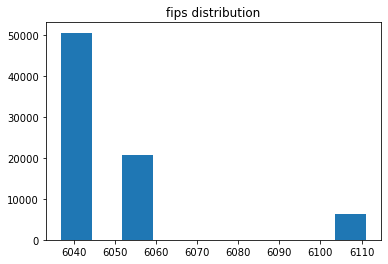

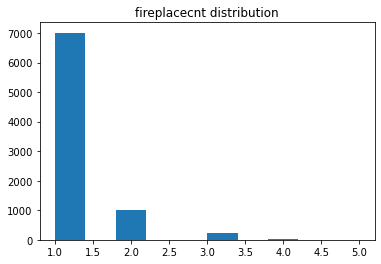

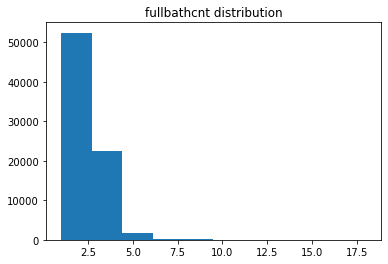

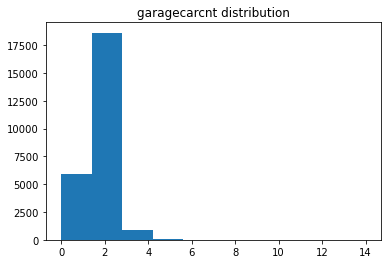

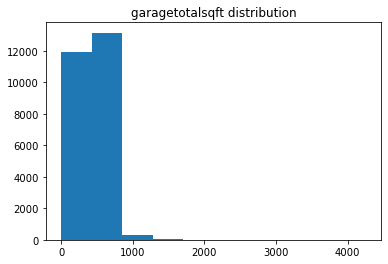

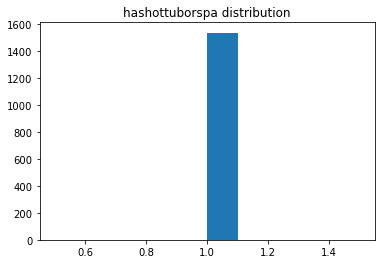

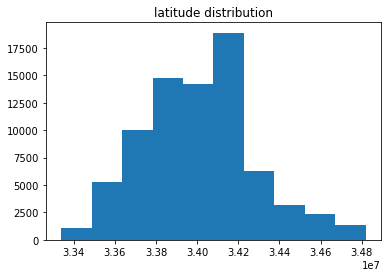

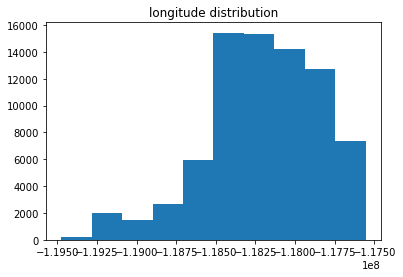

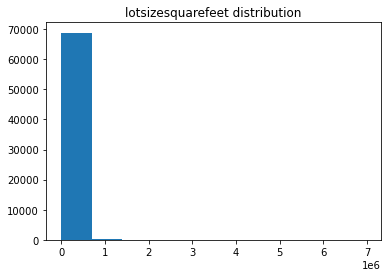

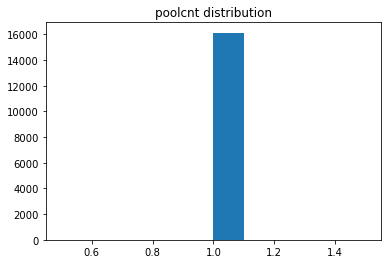

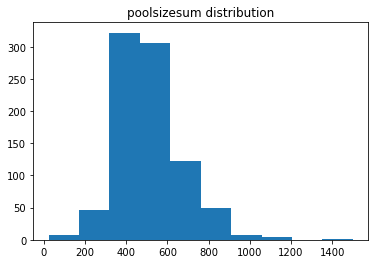

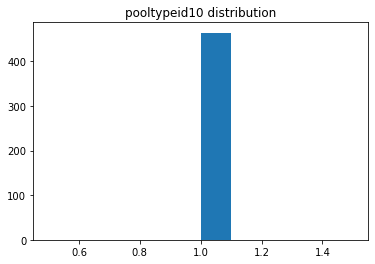

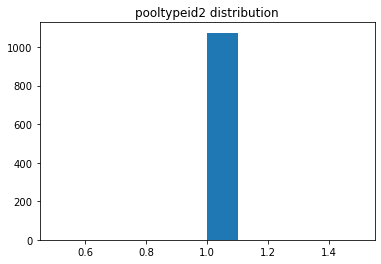

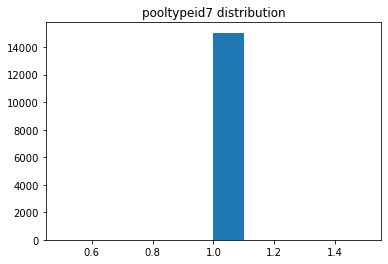

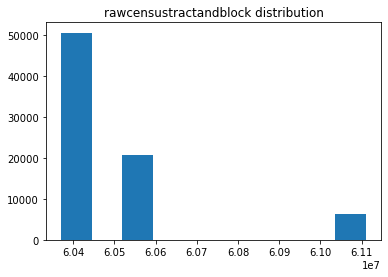

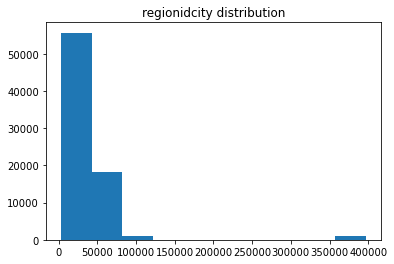

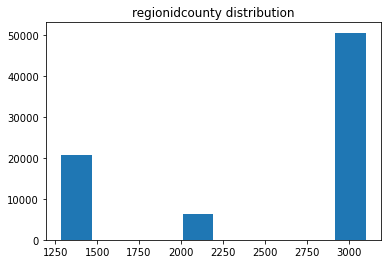

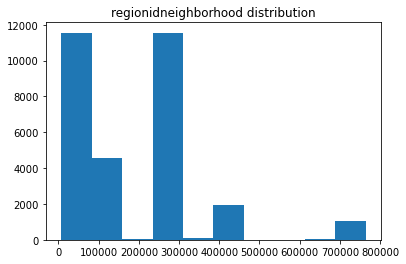

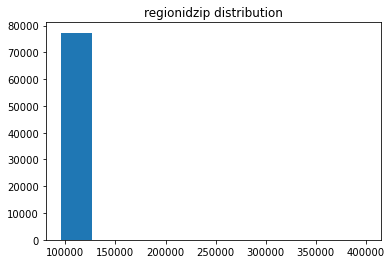

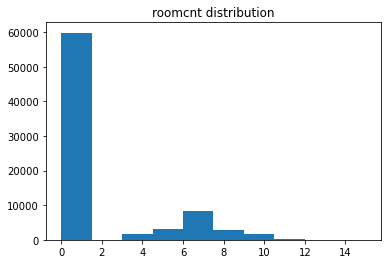

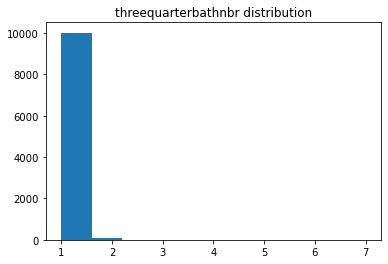

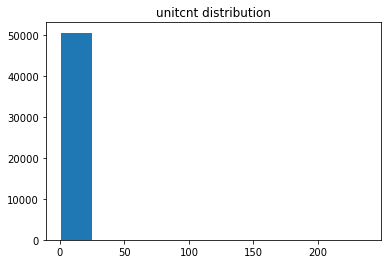

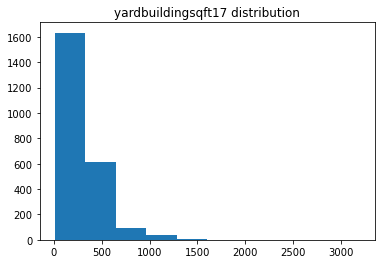

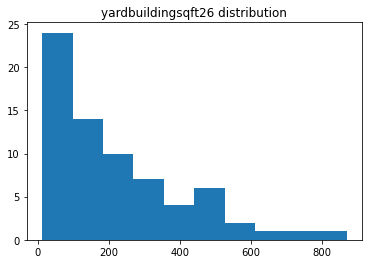

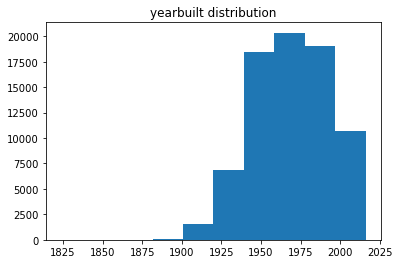

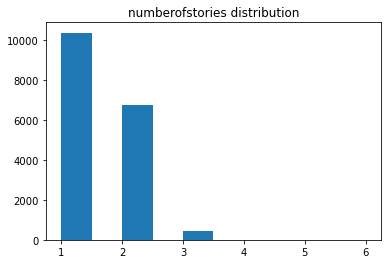

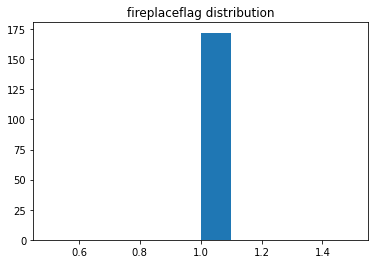

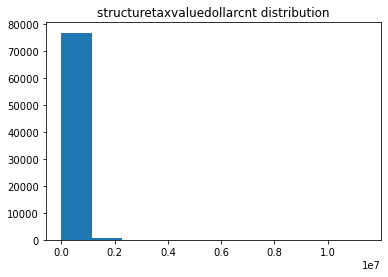

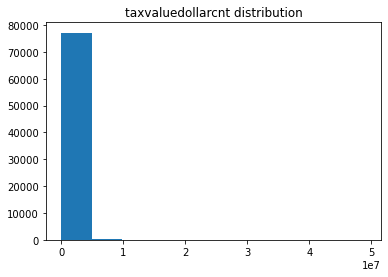

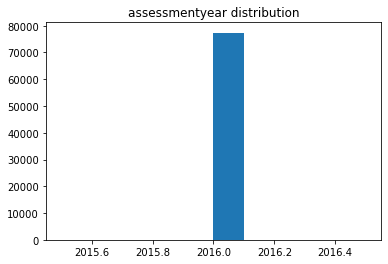

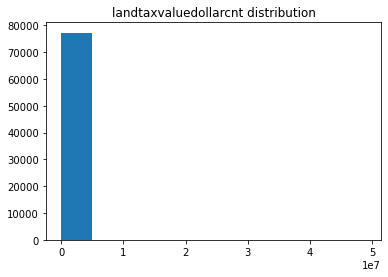

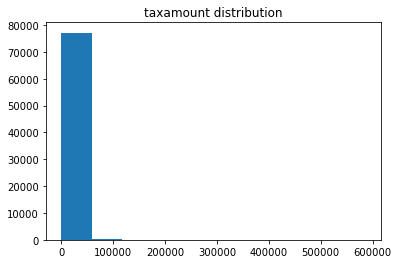

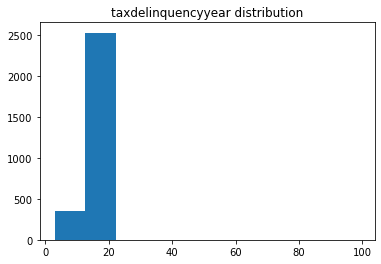

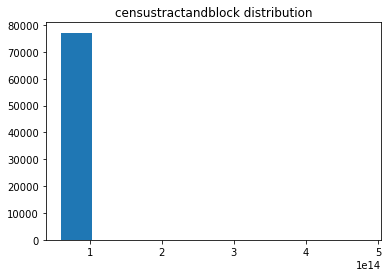

In [14]:
# distribution of the data
con_cols = [col for col in df.columns if (df[col].dtype == 'int64') | (df[col].dtype == 'float64')]

for col in con_cols:
    plt.hist(df[col])
    plt.title(f"{col} distribution")
    plt.show()

# Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [15]:
df.isnull().sum() # get columns paired with the number of nulls in that column

typeconstructiontypeid    77159
storytypeid               77331
propertylandusetypeid         0
heatingorsystemtypeid     27941
buildingclasstypeid       77366
                          ...  
buildingclassdesc         77366
heatingorsystemdesc       27941
propertylandusedesc           0
storydesc                 77331
typeconstructiondesc      77159
Length: 69, dtype: int64

In [16]:
df.isnull().sum()/df.shape[0] # get percent of nulls in each column

typeconstructiontypeid    0.997131
storytypeid               0.999354
propertylandusetypeid     0.000000
heatingorsystemtypeid     0.361083
buildingclasstypeid       0.999806
                            ...   
buildingclassdesc         0.999806
heatingorsystemdesc       0.361083
propertylandusedesc       0.000000
storydesc                 0.999354
typeconstructiondesc      0.997131
Length: 69, dtype: float64

In [17]:
# capturing values in variables

num_missing = df.isnull().sum()
pct_missing = df.isnull().sum()/df.shape[0] 

In [18]:
pd.DataFrame({'num_rows_missing': num_missing, 'pct_rows_missing': pct_missing}) # create dataframe using variables

,num_rows_missing,pct_rows_missing
typeconstructiontypeid,77159,0.997131
storytypeid,77331,0.999354
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,27941,0.361083
buildingclasstypeid,77366,0.999806
...,...,...
buildingclassdesc,77366,0.999806
heatingorsystemdesc,27941,0.361083
propertylandusedesc,0,0.000000
storydesc,77331,0.999354


In [19]:
def nulls_by_col(df):
    '''
    take in a dataframe 
    return a dataframe with each cloumn name as a row 
    each row will show the number and percent of nulls in the column
    
    '''
    
    num_missing = df.isnull().sum()   # get columns paired with the number of nulls in that column
    
    pct_missing = df.isnull().sum()/df.shape[0] # get percent of nulls in each column
    
    return pd.DataFrame({'num_rows_missing': num_missing, 'pct_rows_missing': pct_missing}) # create/return dataframe

In [20]:
nulls_by_col(df)

,num_rows_missing,pct_rows_missing
typeconstructiontypeid,77159,0.997131
storytypeid,77331,0.999354
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,27941,0.361083
buildingclasstypeid,77366,0.999806
...,...,...
buildingclassdesc,77366,0.999806
heatingorsystemdesc,27941,0.361083
propertylandusedesc,0,0.000000
storydesc,77331,0.999354


### Takeaways: 
* Columns have a largely varied number of nulls 
* Drop columns with less than half non_null values
* Treat the rest as a case by case

# Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.


In [21]:
df.isnull().sum(axis=1) # number of columns that are missing in each row

0        36
1        33
2        34
3        32
4        29
         ..
77575    33
77576    32
77577    32
77578    34
77579    34
Length: 77381, dtype: int64

In [22]:
df.isnull().sum(axis=1)/df.shape[1]*100 # percent of columns missing in each row 

0        52.173913
1        47.826087
2        49.275362
3        46.376812
4        42.028986
           ...    
77575    47.826087
77576    46.376812
77577    46.376812
77578    49.275362
77579    49.275362
Length: 77381, dtype: float64

In [23]:
# capture series in veriables

num_cols_missing = df.isnull().sum(axis=1)

pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100

In [24]:
# create a dataframe for the series and reset the index creating an index column

df_cols = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index()
df_cols

,index,num_cols_missing,pct_cols_missing
0,0,36,52.173913
1,1,33,47.826087
2,2,34,49.275362
3,3,32,46.376812
4,4,29,42.028986
...,...,...,...
77376,77575,33,47.826087
77377,77576,32,46.376812
77378,77577,32,46.376812
77379,77578,34,49.275362


In [25]:
# group by count of both columns, turns index column into a count of matching rows

df_cols = df_cols.groupby(['num_cols_missing','pct_cols_missing']).count()
df_cols.head()

,,index
num_cols_missing,pct_cols_missing,
23,33.333333,2
24,34.782609,13
25,36.231884,24
26,37.681159,65
27,39.130435,316


In [26]:
# change the index name and reset the index

df_cols = df_cols.rename(index=str, columns={'index': 'num_rows'}).reset_index()
df_cols.head()

,num_cols_missing,pct_cols_missing,num_rows
0,23,33.33333333333333,2
1,24,34.78260869565217,13
2,25,36.231884057971016,24
3,26,37.68115942028986,65
4,27,39.130434782608695,316


In [27]:
def nulls_by_row(df):
    '''take in a dataframe 
       get count of missing columns per row
       percent of missing columns per row 
       and number of rows missing the same number of columns
       in a dataframe'''
    
    num_cols_missing = df.isnull().sum(axis=1) # number of columns that are missing in each row
    
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100  # percent of columns missing in each row 
    
    # create a dataframe for the series and reset the index creating an index column
    # group by count of both columns, turns index column into a count of matching rows
    # change the index name and reset the index
    
    return (pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index()
            .groupby(['num_cols_missing','pct_cols_missing']).count()
            .rename(index=str, columns={'index': 'num_rows'}).reset_index())

In [28]:
nulls_by_row(df)

,num_cols_missing,pct_cols_missing,num_rows
0,23,33.33333333333333,2
1,24,34.78260869565217,13
2,25,36.231884057971016,24
3,26,37.68115942028986,65
4,27,39.130434782608695,316
5,28,40.57971014492754,455
6,29,42.028985507246375,5270
7,30,43.47826086956522,3455
8,31,44.927536231884055,9891
9,32,46.3768115942029,12579


### Takeaways: 
* Rows missing between 33.33 and 70 percent of cols
* Drop rows with less than half non_null cols
* Treat the rest as a case by case

# Prepare

## Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [29]:
df.propertylandusedesc.value_counts()

Single Family Residential                     52320
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [30]:
# remove rows based on propertylanduse
df = df[(df.propertylandusedesc == 'Single Family Residential') |
          (df.propertylandusedesc == 'Mobile Home') |
          (df.propertylandusedesc == 'Manufactured, Modular, Prefabricated Homes') |
          (df.propertylandusedesc == 'Townhouse')]

In [31]:
df.shape

(52458, 69)

<AxesSubplot:>

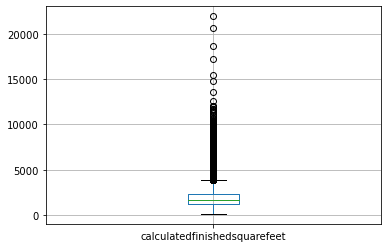

In [32]:
# median area 2017: 2,400

df.boxplot(column='calculatedfinishedsquarefeet')

<AxesSubplot:>

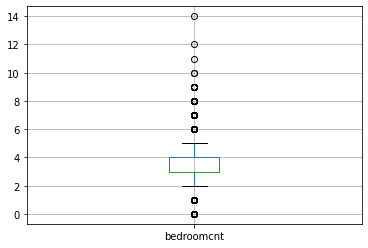

In [33]:
df.boxplot(column='bedroomcnt')

<AxesSubplot:>

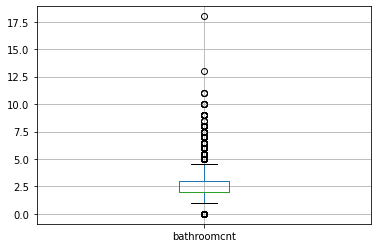

In [34]:
df.boxplot(column='bathroomcnt')

In [35]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[f'{col}'].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[f'{col}'] > lower_bound) & (df[f'{col}'] < upper_bound)]
        
    return df

In [36]:
df = remove_outliers(df, 1.5, ['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt'])

In [37]:
df.shape

(48330, 69)

# Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

## The input:
* A dataframe
* A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
* A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

## The output:
* The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

In [38]:
# set test proportions
prop_required_column = .5
prop_required_row = .5

In [39]:
int(round(prop_required_column*df.shape[0],0)) # get minimum acceptable nulls in each column

24165

In [40]:
# set as thresh

col_thresh = int(round(prop_required_column*df.shape[0],0))

In [41]:
# drop columns based on threshold number
df.dropna(axis=1, thresh=col_thresh, inplace=True)

In [42]:
# same for rows 

row_thresh = int(round(prop_required_row*df.shape[1],0))

In [43]:
df.dropna(axis=0, thresh=row_thresh, inplace=True)

In [44]:
df.shape

(48330, 35)

In [45]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .5):
    ''' 
        take in a dataframe and a proportion for columns and rows
        return dataframe with columns and rows not meeting proportions dropped
    '''
    col_thresh = int(round(prop_required_column*df.shape[0],0)) # calc column threshold
    
    df.dropna(axis=1, thresh=col_thresh, inplace=True) # drop columns with non-nulls less than threshold
    
    row_thresh = int(round(prop_required_row*df.shape[1],0))  # calc row threshhold
    
    df.dropna(axis=0, thresh=row_thresh, inplace=True) # drop columns with non-nulls less than threshold
    
    return df

# Decide how to handle the remaining missing values:

* Fill with constant value.
* Impute with mean, median, mode.
* Drop row/column

In [46]:
df.isnull().sum()[df.isnull().sum()>0] # look at cols with nulls

heatingorsystemtypeid         16769
buildingqualitytypeid         16850
calculatedbathnbr                14
finishedsquarefeet12            154
fullbathcnt                      14
lotsizesquarefeet               257
propertyzoningdesc            16861
regionidcity                    901
regionidzip                      18
unitcnt                       16842
yearbuilt                        24
structuretaxvaluedollarcnt       61
taxvaluedollarcnt                 1
landtaxvaluedollarcnt             1
taxamount                         4
censustractandblock              82
heatingorsystemdesc           16769
dtype: int64

In [47]:
df.isnull().sum()[df.isnull().sum()>16000] # look at cols with large amounts of nulls

heatingorsystemtypeid    16769
buildingqualitytypeid    16850
propertyzoningdesc       16861
unitcnt                  16842
heatingorsystemdesc      16769
dtype: int64

In [48]:
# value counts for cals with large amounts of nulls
for col in ['heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt', 'heatingorsystemdesc']:
    
    print(col)
    print(df[col].value_counts())

heatingorsystemtypeid
2.0     18900
7.0     12078
6.0       483
20.0       68
13.0       16
1.0         7
18.0        6
10.0        2
24.0        1
Name: heatingorsystemtypeid, dtype: int64
buildingqualitytypeid
6.0     10156
8.0      8078
4.0      7958
7.0      3009
5.0      1286
9.0       669
11.0      152
3.0       113
10.0       45
12.0        9
1.0         4
2.0         1
Name: buildingqualitytypeid, dtype: int64
propertyzoningdesc
LAR1         6111
LARS         1349
LBR1N        1082
SCUR2         699
TORR-LO       529
             ... 
SLR1A*          1
SGCR*           1
LNC4YY          1
WHR175          1
IRA15000*       1
Name: propertyzoningdesc, Length: 1229, dtype: int64
unitcnt
1.0    31469
2.0       18
3.0        1
Name: unitcnt, dtype: int64
heatingorsystemdesc
Central       18900
Floor/Wall    12078
Forced air      483
Solar            68
None             16
Baseboard         7
Radiant           6
Gravity           2
Yes               1
Name: heatingorsystemdesc, dtype:

In [49]:
# dropping the columns with 16K missing values too much to fill/impute/drop rows

df = df.drop(columns=['heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt', 'heatingorsystemdesc'])

In [50]:
df.shape

(48330, 30)

In [51]:
df.isnull().sum()[df.isnull().sum()>0] # look at remaining nulls

calculatedbathnbr              14
finishedsquarefeet12          154
fullbathcnt                    14
lotsizesquarefeet             257
regionidcity                  901
regionidzip                    18
yearbuilt                      24
structuretaxvaluedollarcnt     61
taxvaluedollarcnt               1
landtaxvaluedollarcnt           1
taxamount                       4
censustractandblock            82
dtype: int64

In [52]:
# value counts for remaining cols that are descreet

for col in ['calculatedbathnbr', 'fullbathcnt', 'regionidcity', 'regionidzip', 'yearbuilt', 'censustractandblock']:
    
    print(col)
    print(df[col].value_counts())
    print()

calculatedbathnbr
2.0    21800
3.0    10356
1.0     8979
2.5     3900
4.0     1689
1.5      831
3.5      761
Name: calculatedbathnbr, dtype: int64

fullbathcnt
2.0    25711
3.0    11118
1.0     9810
4.0     1677
Name: fullbathcnt, dtype: int64

regionidcity
12447.0    10369
5534.0      1743
40227.0     1460
46298.0     1362
16764.0     1037
           ...  
31134.0        2
53162.0        1
10815.0        1
21395.0        1
36078.0        1
Name: regionidcity, Length: 175, dtype: int64

regionidzip
97319.0    742
97318.0    663
97329.0    542
97328.0    515
97118.0    460
          ... 
96434.0      2
96148.0      1
97092.0      1
96038.0      1
96467.0      1
Name: regionidzip, Length: 378, dtype: int64

yearbuilt
1955.0    1856
1950.0    1554
1954.0    1476
1953.0    1451
1956.0    1356
          ... 
1897.0       1
1878.0       1
1889.0       1
1880.0       1
1882.0       1
Name: yearbuilt, Length: 132, dtype: int64

censustractandblock
6.037920e+13    32
6.059032e+13    21
6.037901

In [53]:
# impute columns *do this after you split*

def impute(df, my_strategy, column_list):
    ''' take in a df, strategy, and cloumn list
        return df with listed columns imputed using input stratagy
    '''
        
    imputer = SimpleImputer(strategy=my_strategy)  # build imputer

    df[column_list] = imputer.fit_transform(df[column_list]) # fit/transform selected columns

    return df

In [54]:
df = impute(df, 'most_frequent', ['calculatedbathnbr', 'fullbathcnt', 'regionidcity', 'regionidzip', 'yearbuilt', 'censustractandblock'])

In [55]:
df.isnull().sum()[df.isnull().sum()>0] # look at remaining nulls

finishedsquarefeet12          154
lotsizesquarefeet             257
structuretaxvaluedollarcnt     61
taxvaluedollarcnt               1
landtaxvaluedollarcnt           1
taxamount                       4
dtype: int64

In [56]:
df = impute(df, 'median', ['finishedsquarefeet12', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'])

In [57]:
df.isnull().sum()

propertylandusetypeid           0
parcelid                        0
id                              0
logerror                        0
transactiondate                 0
id.1                            0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
propertylandus

# wrangle_zillow

In [58]:
###############acquire#################


def get_connection(database, user=user, host=host, password=password):
    '''get URL with user, host, and password from env '''
    
    return f"mysql+pymysql://{user}:{password}@{host}/{database}"
    
    
def cache_sql_data(df, database):
    '''write dataframe to csv with title database_query.csv'''
    
    df.to_csv(f'{database}_query.csv',index = False)
        

def get_sql_data(database,query):
    ''' check if csv exists for the queried database
        if it does read from the csv
        if it does not create the csv then read from the csv  
    '''
    
    if os.path.isfile(f'{database}_query.csv') == False:   # check for the file
        
        df = pd.read_sql(query, get_connection(database))  # create file 
        
        cache_sql_data(df, database) # cache file
        
    return pd.read_csv(f'{database}_query.csv') # return contents of file


def get_zillow_data():
    ''' acquire zillow data'''
    
    query = '''

    select * 
    from predictions_2017

    left join properties_2017 using(parcelid)
    left join airconditioningtype using(airconditioningtypeid)
    left join architecturalstyletype using(architecturalstyletypeid)
    left join buildingclasstype using(buildingclasstypeid)
    left join heatingorsystemtype using(heatingorsystemtypeid)
    left join propertylandusetype using(propertylandusetypeid)
    left join storytype using(storytypeid)
    left join typeconstructiontype using(typeconstructiontypeid)

    where latitude is not null

    and longitude is not null

    '''

    database = "zillow"
    
    df = get_sql_data(database,query) # create/read csv for query
    
    df = df.sort_values('transactiondate').drop_duplicates('parcelid',keep='last') # drop duplicate parcelids keeping the latest
    
    return df 

#################################prepare###############################

def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[f'{col}'].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        return df[(df[f'{col}'] > lower_bound) & (df[f'{col}'] < upper_bound)]  
    

def handle_missing_values(df, prop_required_column = .5, prop_required_row = .5):
    ''' 
        take in a dataframe and a proportion for columns and rows
        return dataframe with columns and rows not meeting proportions dropped
    '''
    col_thresh = int(round(prop_required_column*df.shape[0],0)) # calc column threshold
    
    df.dropna(axis=1, thresh=col_thresh, inplace=True) # drop columns with non-nulls less than threshold
    
    row_thresh = int(round(prop_required_row*df.shape[1],0))  # calc row threshhold
    
    df.dropna(axis=0, thresh=row_thresh, inplace=True) # drop columns with non-nulls less than threshold
    
    return df    
    
    
def impute(df, my_strategy, column_list):
    ''' take in a df strategy and cloumn list
        return df with listed columns imputed using input stratagy
    '''
        
    imputer = SimpleImputer(strategy=my_strategy)  # build imputer

    df[column_list] = imputer.fit_transform(df[column_list]) # fit/transform selected columns

    return df

def prepare_zillow(df):
    ''' Prepare Zillow Data'''
    
    # Restrict propertylandusedesc to those of single unit
    df = df[(df.propertylandusedesc == 'Single Family Residential') |
          (df.propertylandusedesc == 'Mobile Home') |
          (df.propertylandusedesc == 'Manufactured, Modular, Prefabricated Homes') |
          (df.propertylandusedesc == 'Townhouse')]
    
    # remove outliers in bed count, bath count, and area to better target single unit properties
    df = remove_outliers(df, 1.5, ['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt'])
    
    # dropping cols/rows where more than half of the values are null
    df = handle_missing_values(df, prop_required_column = .5, prop_required_row = .5)
    
    # dropping the columns with 17K missing values too much to fill/impute/drop rows
    df = df.drop(columns=['heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt', 'heatingorsystemdesc'])
    
    # imputing descreet columns with most frequent value
    df = impute(df, 'most_frequent', ['calculatedbathnbr', 'fullbathcnt', 'regionidcity', 'regionidzip', 'yearbuilt', 'censustractandblock'])
    
    # imputing continuous columns with median value
    df = impute(df, 'median', ['finishedsquarefeet12', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'])
    
    return df

In [59]:
df = prepare_zillow(get_zillow_data())
df.head()

,propertylandusetypeid,parcelid,id,logerror,transactiondate,id.1,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc
0,261.0,14297519,0,0.025595,2017-01-01,1727539,3.5,4.0,3.5,3100.0,...,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,Single Family Residential
1,261.0,17052889,1,0.055619,2017-01-01,1387261,1.0,2.0,1.0,1465.0,...,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,Single Family Residential
2,261.0,14186244,2,0.005383,2017-01-01,11677,2.0,3.0,2.0,1243.0,...,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,Single Family Residential
3,261.0,12177905,3,-0.103410,2017-01-01,2288172,3.0,4.0,3.0,2376.0,...,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,Single Family Residential
6,261.0,12095076,6,-0.001011,2017-01-01,781532,3.0,4.0,3.0,2962.0,...,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,Single Family Residential
